In [313]:
##Analyze stock marktet data with python 

In [314]:
##－－－moving average,formulate exit strategies upon entering a position,how to evaluate a strategy with backtesting

In [445]:
import pandas as pd 

In [446]:
import seaborn as sns

In [447]:
import numpy as np

In [448]:
import datetime

In [449]:
cd Downloads/stock

[Errno 2] No such file or directory: 'Downloads/stock'
/Users/mengyiwang/Downloads/stock


In [450]:
Apple=pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv',index_col = 'Date')

In [451]:
IBM=pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv',index_col = 'Date')

In [452]:
MSFT=pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv',index_col = 'Date')

In [453]:
Apple.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [454]:
#open is the pirce of the stock at the beginning of the trading day 
#high is the lowest price of the stock on that trading day 
# close is the price of the stock at closing time
# Volume is how many stocks were traded 

In [455]:
import matplotlib.pyplot as plt 

In [456]:
import matplotlib.dates as mdates

In [457]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [458]:
%matplotlib inline 

Apple["Close"].plot(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')

In [459]:
#compare stock price with other Tech Companies

In [460]:
stocks=pd.DataFrame({"AAPL":Apple['Close'],"IBM":IBM['Close'],"MSFT":MSFT['Close']})

In [461]:
stocks.head()

,AAPL,IBM,MSFT
2006-01-03,10.68,82.06,26.84
2006-01-04,10.71,81.95,26.97
2006-01-05,10.63,82.50,26.99
2006-01-06,10.90,84.95,26.91
2006-01-09,10.86,83.73,26.86


# 1st Diagram

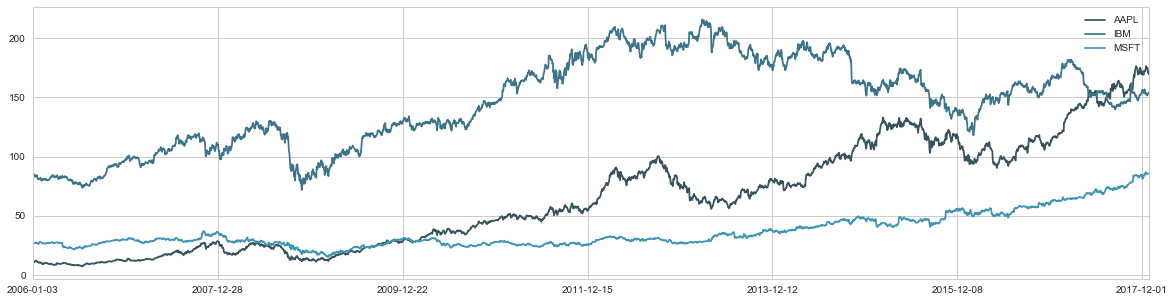

In [463]:
stocks.plot(figsize=(20,5),grid=True)

# 2nd Diagram

In [464]:
#for stock market， relative change of an asset is more valuable than the absolute price,so we compare the diffierence that each companies made

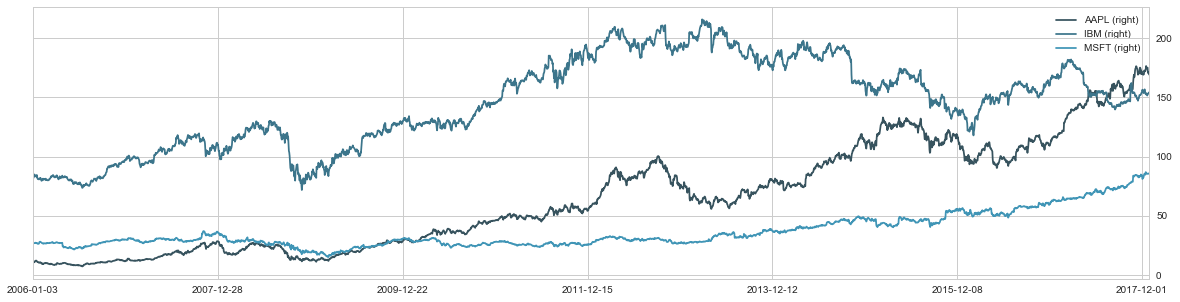

In [465]:
stocks.plot(secondary_y=['AAPL','IBM','MSFT'],figsize=(20,5),grid=True)  #??? where is value on the ylabel?

# 3rd Diagram

In [466]:
##Plot the stocks'returns---transforming our data into sth more useful(made multiple transformations) :returnt,0=pricet/price0

In [467]:
stock_return = stocks.apply(lambda x: x/x[0]) #df.apply(arg) will apply the function arg to each column in df,and return a DataFrame with the result

In [468]:
stock_return.head()

,AAPL,IBM,MSFT
2006-01-03,1.000000,1.000000,1.000000
2006-01-04,1.002809,0.998660,1.004844
2006-01-05,0.995318,1.005362,1.005589
2006-01-06,1.020599,1.035218,1.002608
2006-01-09,1.016854,1.020351,1.000745


# 4th Diagram

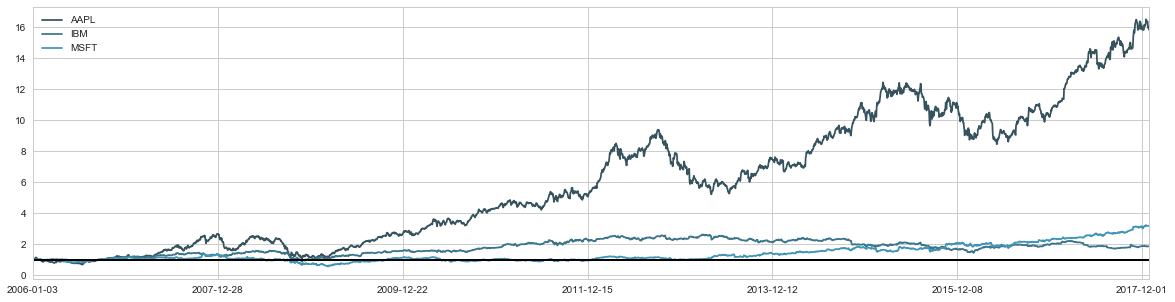

In [469]:
stock_return.plot(figsize=(20,5),grid=True).axhline(y=1,color='black',lw=2)
#we can see how profiatble each stock was since the beginning of the period---change between each point and the beginning point

In [470]:
#Stock price_everyday changes
#change_t=log(price_t)-log(price_t-1) (we use numpy's log function since dif formulas with dif denominator will occur dif results)

In [471]:
import numpy as np

In [472]:
stock_change = stocks.apply(lambda x:np.log(x)-np.log(x.shift(1)))  ## shift function move date back by 1

In [473]:
stock_change.head()

,AAPL,IBM,MSFT
2006-01-03,NaN,NaN,NaN
2006-01-04,0.002805,-0.001341,0.004832
2006-01-05,-0.007498,0.006689,0.000741
2006-01-06,0.025083,0.029265,-0.002968
2006-01-09,-0.003676,-0.014466,-0.001860


# 5th Diagram

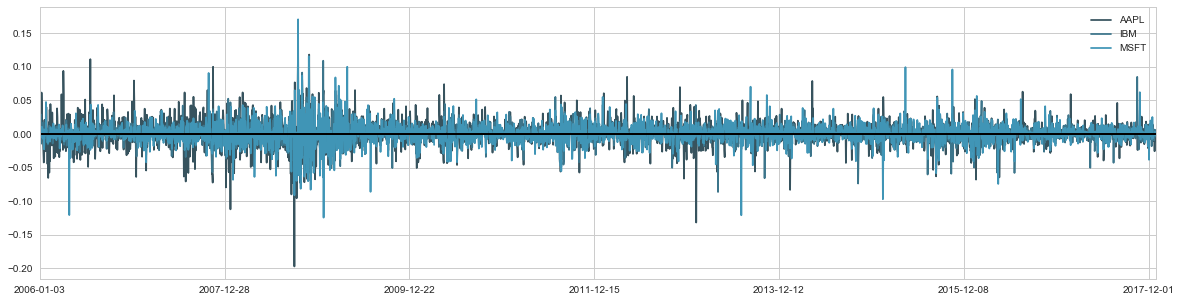

In [474]:
stock_change.plot(figsize=(20,5),grid=True).axhline(y=0,color = "black",lw = 2)

# 6th Diagram

In [475]:
##the relationship between everyday APPLE open price and everyday APPLE volume 

In [476]:
Apple1=pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [477]:
X=Apple1[['Open']] 

In [478]:
y=Apple1['Volume']

In [479]:
from sklearn.model_selection import train_test_split

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [481]:
from sklearn.linear_model import LinearRegression

In [482]:
lm = LinearRegression()

In [483]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [484]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1563756.12620932]


In [485]:
predictions = lm.predict( X_test)

# 7th Diagram

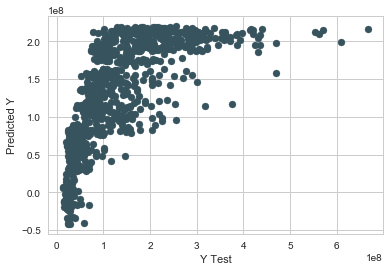

In [490]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')     

# 8th Diagram

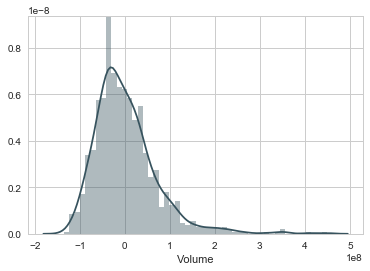

In [491]:
sns.distplot((y_test-predictions),bins=50);

In [492]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

AttributeError: 'NoneType' object has no attribute 'DataFrame'

In [493]:
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np

# 9th Diagram

In [494]:
### USE candlestick to show four variables of Apple stock data

(<matplotlib.collections.LineCollection at 0x12b5aa7b8>,
 <matplotlib.collections.PolyCollection at 0x128463908>)

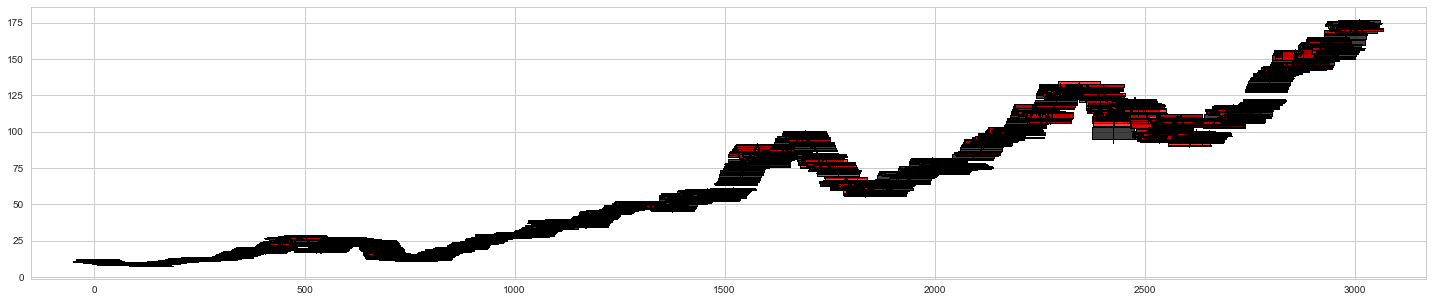

In [495]:
fig, ax = plt.subplots(figsize=(25,5))
candlestick2_ohlc(ax,Apple['Open'],Apple['High'],Apple['Low'],Apple['Close'],width=100)

In [496]:
from datetime import timedelta
from datetime import datetime
import time

In [497]:
Apple["20d"] = np.round(Apple["Close"].rolling(window = 20, center = False).mean(), 2)

In [498]:
Apple["50d"] = np.round(Apple["Close"].rolling(window = 50, center = False).mean(), 2)

In [499]:
Apple['20d-50d'] = Apple['20d'] - Apple['50d']
Apple.tail()

,Open,High,Low,Close,Volume,Name,20d,50d,200d,20d-50d
Date,,,,,,,,,,
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL,172.24,169.04,155.30,3.20
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL,172.07,169.31,155.46,2.76
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL,171.94,169.53,155.62,2.41
2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL,172.02,169.74,155.77,2.28
2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL,171.89,169.93,155.91,1.96


# 10th Diagram

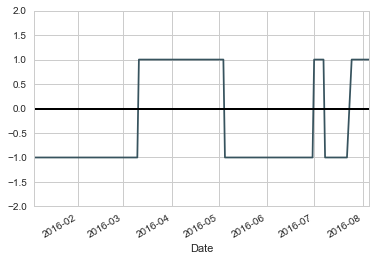

In [500]:
# Trading strategy——-backtesting：looking at how profitable the strategy is on historical data. For example, looking at the above chart’s performance on Apple stock, if the 20-day moving average is the fast moving average and the 50-day moving average the slow, this strategy does not appear to be very profitable, at least not if you are always taking long positions.
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
Apple["Regime"] = np.where(Apple['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
Apple["Regime"] = np.where(Apple['20d-50d'] < 0, -1, Apple["Regime"])
Apple.loc['2016-01-01':'2016-08-07',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)


# 11th Diagram

2017-12-29 00:00:00 2006-01-03 00:00:00


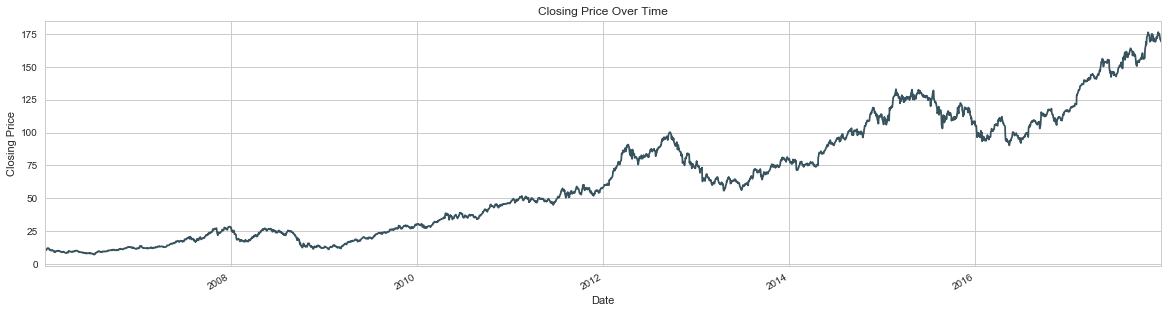

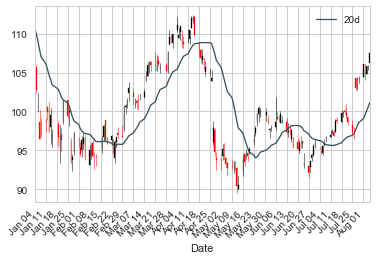

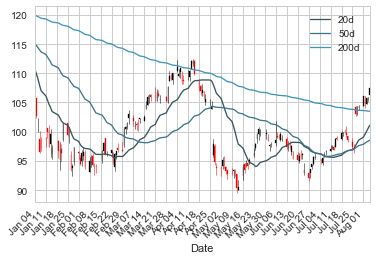

In [501]:
### Moving Averages by Japanese candlestick plot 
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import matplotlib.dates as mdates


def pandas_candlestick_ohlc(dat, stick="day", otherseries=None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)  # major ticks on the mondays
    alldays = DayLocator()  # minor ticks on the days
    dayFormatter = DateFormatter('%d')  # e.g., 12

    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:, ["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1  # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1])  # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month)  # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0])  # Identify years
            grouped = transdat.groupby(list(set(["year", stick])))  # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [],
                                    "Close": []})  # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0, 0],
                                                       "High": max(group.High),
                                                       "Low": min(group.Low),
                                                       "Close": group.iloc[-1, 3]},
                                                      index=[group.index[0]]))
            if stick == "week":
                stick = 5
            elif stick == "month":
                stick = 30
            elif stick == "year":
                stick = 365
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame(
            {"Open": [], "High": [], "Low": [], "Close": []})  # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0, 0],
                                                   "High": max(group.High),
                                                   "Low": min(group.Low),
                                                   "Close": group.iloc[-1, 3]},
                                                  index=[group.index[0]]))
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')

    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)

    ax.grid(True)

    # Create the candelstick chart
    candlestick_ohlc(ax, list(
        zip(list(mdates.date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
            plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                     colorup="black", colordown="red", width=stick * .4)

    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:, otherseries].plot(ax=ax, lw=1.3, grid=True)

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.show()

#use pandas to load data from csv file
Apple.index = pd.to_datetime(Apple.index)
print(Apple.index[-1], Apple.index[0])

#print column names
#['Open' 'High' 'Low' 'Close' 'Volume' 'Name']
# print Apple.columns.values

#print data frame shape (row * columns)
# print Apple.shape

Apple["Close"].plot(figsize=(20, 5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
#need call this to show graph
# plt.show()

# pandas_candlestick_ohlc(Apple)


Apple["20d"] = np.round(Apple["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(Apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

Apple["50d"] = np.round(Apple["Close"].rolling(window=50, center=False).mean(), 2)
Apple["200d"] = np.round(Apple["Close"].rolling(window=200, center=False).mean(), 2)

pd=pandas_candlestick_ohlc(Apple.loc['2016-01-04 00:00:00':'2016-08-07 00:00:00', :], otherseries=["20d", "50d", "200d"])
